## Задание.
При фиксированном seed=42 поразбирайтесь и поэкспериментируйте с параметрами алгоритма дифференциальной эволюции: strategy, popsize, tol, mutation, recombination и updating.

Постройте графики количества итераций оптимизации функции ackley от значения параметра.

In [2]:
import numpy as np
from scipy.optimize import differential_evolution
import matplotlib.pyplot as plt
import random

In [3]:

def ackley(x):
    arg1 = -0.2 * np.sqrt(0.5 * (x[0] ** 2 + x[1] ** 2))
    arg2 = 0.5 * (np.cos(2. * np.pi * x[0]) + np.cos(2. * np.pi * x[1]))
    return -20. * np.exp(arg1) - np.exp(arg2) + 20. + np.e

bounds = [(-10, 10), (-10, 10)]

result = differential_evolution(ackley, bounds,seed=42)
result


     fun: 4.440892098500626e-16
 message: 'Optimization terminated successfully.'
    nfev: 2793
     nit: 90
 success: True
       x: array([0., 0.])

### Зависимость числа итераций от параметра strategy

In [17]:
startegy = ['best1bin','best1exp','rand1exp','randtobest1exp','currenttobest1exp',
            'best2exp','rand2exp','randtobest1bin','currenttobest1bin','best2bin','rand2bin','rand1bin']
res = []
for strat in startegy:
    res += [differential_evolution(ackley, bounds, strategy=strat, seed=42).nit]

<BarContainer object of 12 artists>

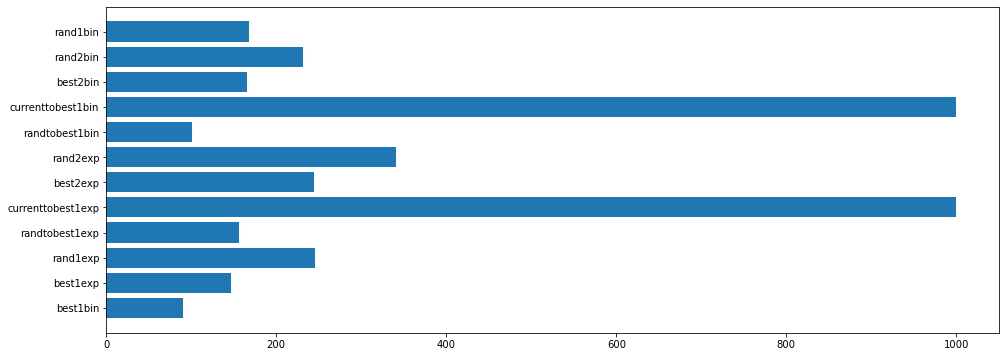

In [18]:
plt.figure(figsize=(16,6))
plt.barh(startegy, res)

### Зависимость числа итераций от параметра popsize

In [10]:
res = []
ran = []
for ps in range(0,100):
    res += [differential_evolution(ackley, bounds, popsize=ps, seed=42).nit]
    ran += [ps]

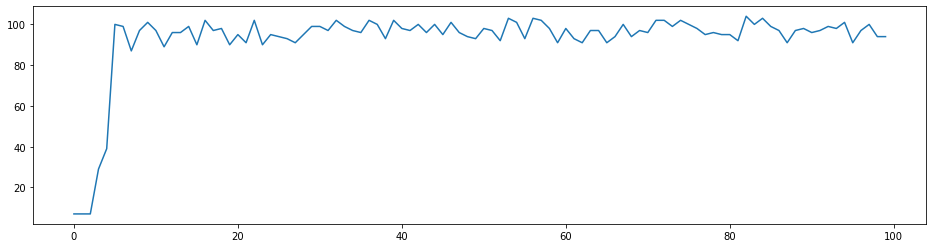

In [15]:
plt.figure(figsize=(16,4))
plt.plot(ran, res)

### Зависимость числа итераций от параметра tol

In [99]:
res = []
ran = []
for i in range(0,1000):
    
    param = random.random()
    ran += [param]
    res += [differential_evolution(ackley, bounds, tol=param, seed=42).nit]

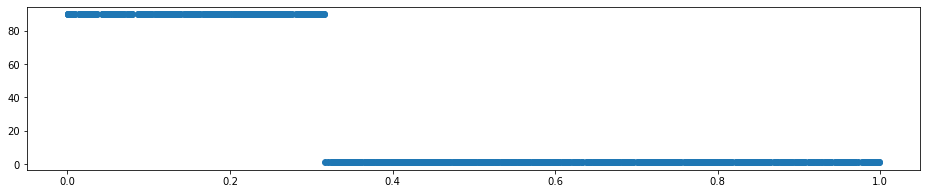

In [100]:
plt.figure(figsize=(16,3))
plt.scatter(ran, res)

### Зависимость числа итераций от параметра mutation

In [5]:
res = []
ran = []
for i in range(0,1000):
    
    param = random.uniform(0,2)
    ran += [param]
    res += [differential_evolution(ackley, bounds, mutation=param, seed=42).nit]

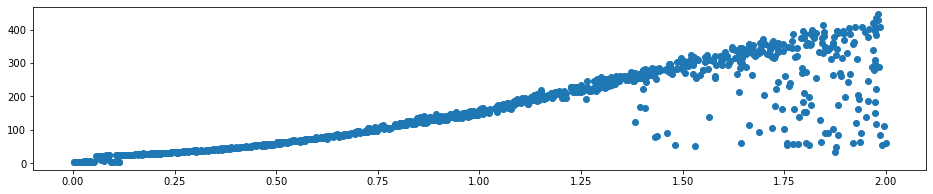

In [6]:
plt.figure(figsize=(16,3))
plt.scatter(ran, res)

### Зависимость числа итераций от параметра recombination

In [7]:
res = []
ran = []
for i in range(0,100):
    
    param = random.random()
    ran += [param]
    res += [differential_evolution(ackley, bounds, recombination=param, seed=42).nit]

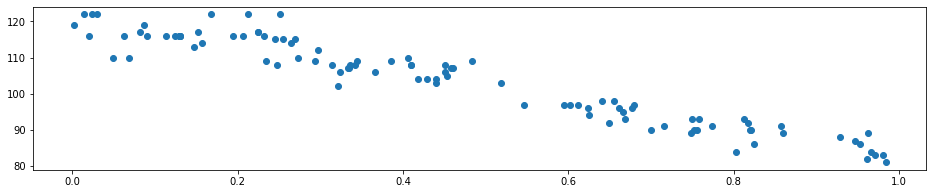

In [8]:
plt.figure(figsize=(16,3))
plt.scatter(ran, res)

### Зависимость числа итераций от параметра updating

In [20]:
res = []
updating = ['immediate', 'deferred']
for up in updating:

    res += [differential_evolution(ackley, bounds, updating=up, seed=42).nit]

<BarContainer object of 2 artists>

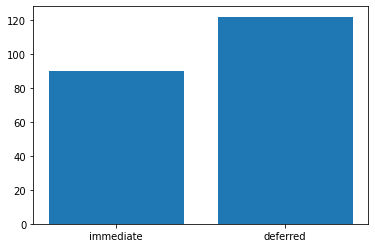

In [21]:
plt.bar(updating, res)

## Дополнительное задание.
Найти множество параметров (strategy=..., ..., updating=...), которые требуют минимального количества итераций.

In [23]:
startegy = ['best1bin','best1exp','rand1exp','randtobest1exp','currenttobest1exp',
            'best2exp','rand2exp','randtobest1bin','currenttobest1bin','best2bin','rand2bin','rand1bin']

updating = ['immediate', 'deferred']

res = 1000

for strat in startegy:
    
    for up in updating:
        new_res = differential_evolution(ackley, bounds,strategy=strat, updating=up, seed=42).nit
        if new_res < res:
            res = new_res
            param = [strat, up]
        
        

In [28]:
print(f'Минимальное число интераций {res} достигается при strategy={param[0]} и strategy={param[1]}')

Минимальное число интераций 90 достигается при strategy=best1bin и strategy=immediate


In [15]:
# Код с использованием

startegy = ['best1bin','best1exp','rand1exp','randtobest1exp','currenttobest1exp',
            'best2exp','rand2exp','randtobest1bin','currenttobest1bin','best2bin','rand2bin','rand1bin']

updating = ['immediate', 'deferred']

res = 1000

  

     
for i in range(2,100):
    pop = i
    tol = random.random()
    mut = random.uniform(0,2)
    rec = random.random()
    
    try:
        new_res = differential_evolution(ackley, bounds,strategy='rand1bin', popsize=i, tol=tol, 
                                     mutation=mut, recombination=rec, 
                                     updating='immediate', seed=42).nit

        if new_res < res:
            res = new_res
            param = [pop, tol, mut, rec]
    except:
        print('Err')
    
        
        

In [17]:
print(f'Минимальное число итераций {res}, было достигнуто, при использовании параметров')
print(f'trategy=rand1bin, popsize={param[0]}, tol={param[1]}') 
print(f'mutation={param[2]}, recombination={param[3]}, updating=immediate')

Минимальное число итераций 1, было достигнуто, при использовании параметров
trategy=rand1bin, popsize=3, tol=0.3739315622879834
mutation=1.3240733377539982, recombination=0.9852373169476812, updating=immediate
